# City of Toronto Open Data Analysis

# Loading Data

We have performed a small bit of data cleaning in Microsoft Excel (see details in the README.md -> Documentation -> Data Cleaning).

After this, we are loading the data from the Edited Excel file with the cleaned.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [65]:
# read data from the excel files

# click durations
clicks_duration_df = pd.read_excel('./Dataset_Nov2024/Excel-clicks-duration-2023-2024.xlsx', sheet_name=['data-no-summary', 'data-summary-rows'], header=0)

# # referrer domain
referrer_domain_df = pd.read_excel('./Dataset_Nov2024/Excel-referrer-domain-2023-2024.xlsx', sheet_name=['data-no-summary', 'data-summary'], header=0)

# # search terms
search_terms_df = pd.read_excel('./Dataset_Nov2024/Excel-search-terms-2023-2024.xlsx', sheet_name=['data-no-summary', 'data-summary'], header=0)

# # user-ship metrics
user_ship_df = pd.read_excel('./Dataset_Nov2024/Excel-usership-2023-2024.xlsx', sheet_name=['cleaned-usership'], header=0)

# Exploratory Data Analysis

In [3]:
# show shape of the data frames
# df.shape

print("Clicks Duration "),
print(clicks_duration_df['data-no-summary'].shape)

print("Referrer Domain "),
print(referrer_domain_df['data-no-summary'].shape)

print("Search Terms "),
print(search_terms_df['data-no-summary'].shape)

print("User-ship Metrics "),
print(user_ship_df['cleaned-usership'].shape)

Clicks Duration 
(20487, 11)
Referrer Domain 
(21185, 10)
Search Terms 
(50300, 7)
User-ship Metrics 
(1000, 8)


In [4]:
# df.info()

print("Clicks Duration "),
print(clicks_duration_df['data-no-summary'].info())
print()

print("Referrer Domain "),
print(referrer_domain_df['data-no-summary'].info())
print()

print("Search Terms "),
print(search_terms_df['data-no-summary'].info())
print()

print("User-ship Metrics "),
print(user_ship_df['cleaned-usership'].info())

Clicks Duration 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20487 entries, 0 to 20486
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Client IP                   20487 non-null  object        
 1   Date                        20487 non-null  datetime64[ns]
 2   Date (MM)                   20487 non-null  int64         
 3   Date (DD)                   20487 non-null  int64         
 4   Date (YYYY)                 20487 non-null  int64         
 5   Day of Week                 20487 non-null  object        
 6   Date (Numeric)              20487 non-null  int64         
 7   Views                       20487 non-null  int64         
 8   Avg Session Duration (Sec)  20487 non-null  int64         
 9   OD - File Download Clicks   20487 non-null  int64         
 10  Sessions                    20487 non-null  int64         
dtypes: datetime64[ns](1), int64(8), objec

## Clicks Duration

In [6]:
clicks_duration_df['data-no-summary'].describe()

,Date,Date (MM),Date (DD),Date (YYYY),Date (Numeric),Views,Avg Session Duration (Sec),OD - File Download Clicks,Sessions
count,20487,20487.000000,20487.000000,20487.000000,20487.000000,20487.000000,20487.000000,20487.000000,20487.000000
mean,2024-03-30 10:27:36.347928064,7.151657,15.763362,2023.692293,45381.435837,11.588959,309.905989,0.937424,8.016303
min,2023-01-01 00:00:00,1.000000,1.000000,2023.000000,44927.000000,0.000000,0.000000,0.000000,1.000000
25%,2023-11-10 00:00:00,4.000000,8.000000,2023.000000,45240.000000,1.000000,1.500000,0.000000,1.000000
50%,2024-05-08 00:00:00,8.000000,16.000000,2024.000000,45420.000000,3.000000,35.000000,0.000000,1.000000
75%,2024-09-25 00:00:00,10.000000,23.000000,2024.000000,45560.000000,10.000000,285.000000,1.000000,3.000000
max,2024-11-26 00:00:00,12.000000,31.000000,2024.000000,45622.000000,872.000000,7193.000000,111.000000,96.000000
std,NaN,3.352022,8.702983,0.461556,195.935513,18.771170,654.879822,2.942531,16.093220


Some important stats like mean, standard deviation, min & max.

--------------------------------------------------------------------------
|                    | Views  | Average Session Duration | File Downloads |
|--------------------|--------|--------------------------|----------------|
| Mean               | 11.589 | 309.906 seconds          | 0.937          |
| Standard Deviation | 18.771 | 654.880 seconds          | 2.943          |
| Min                | 0.000  | 0.000 seconds            | 0.000          |
| Max                | 872    | 7193 seconds             | 111            |
--------------------------------------------------------------------------


In [42]:
clicks_duration_df['data-no-summary'].head(10)

,Client IP,Date,Date (MM),Date (DD),Date (YYYY),Day of Week,Date (Numeric),Views,Avg Session Duration (Sec),OD - File Download Clicks,Sessions
0,52.234.146.194,2024-06-24,6,24,2024,Mon,45467,96,0,0,96
1,52.234.146.194,2024-06-21,6,21,2024,Fri,45464,96,0,0,96
2,52.234.146.194,2024-06-23,6,23,2024,Sun,45466,96,0,0,96
3,52.234.146.194,2024-06-22,6,22,2024,Sat,45465,96,0,0,96
4,52.234.146.194,2024-06-20,6,20,2024,Thu,45463,95,0,0,95
5,52.234.146.194,2024-06-25,6,25,2024,Tue,45468,80,0,0,80
6,52.234.146.194,2023-12-17,12,17,2023,Sun,45277,67,0,0,67
7,52.234.146.194,2024-03-03,3,3,2024,Sun,45354,64,0,0,64
8,52.234.146.194,2024-06-19,6,19,2024,Wed,45462,64,0,0,64
9,52.234.146.194,2024-02-29,2,29,2024,Thu,45351,62,0,0,62


In [43]:
clicks_duration_df['data-summary-rows'].head(10)

,Client IP,Views,Avg Session Duration (Sec),OD - File Download Clicks,Sessions
0,52.234.146.194,35385,0,0,35385
1,52.228.26.214,34600,0,0,34600
2,52.237.16.148,32116,0,0,32116
3,52.191.212.99,31312,0,0,31312
4,198.96.187.163,3240,1015,260,398
5,69.77.173.148,3044,279,692,1083
6,198.168.255.130,2662,303,783,956
7,198.96.187.177,2415,690,201,465
8,23.96.205.96,2158,363,138,694
9,142.156.1.236,2106,537,605,446


In [39]:
clicks_duration_df['data-no-summary']['Client IP'].value_counts()

Client IP
52.234.146.194    696
52.237.16.148     696
52.228.26.214     696
52.191.212.99     691
69.77.173.148     406
                 ... 
159.2.26.227        1
99.234.86.130       1
38.98.192.121       1
72.136.120.46       1
140.193.74.30       1
Name: count, Length: 1000, dtype: int64

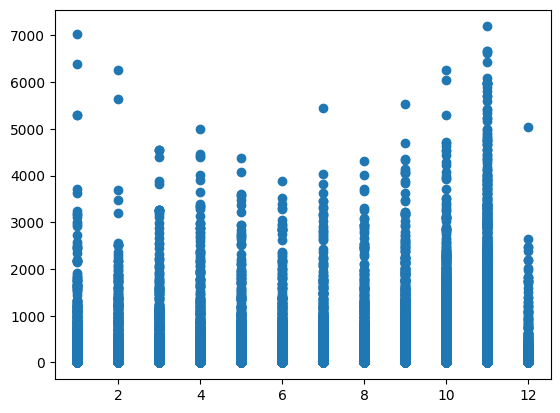

In [30]:
# sorting client ip addresses based on 

## User-ship metrics

In [66]:
user_ship_df['cleaned-usership'].head()

,Link Source -Page URL,Link Source - Page Base URL,Link Source - URL Category,Link Source - Category Details 1,Link Source - Category Details 2,Sessions,Users,Views
0,open.toronto.ca/,open.toronto.ca,NaN,NaN,NaN,265779,219238,307487
1,open.toronto.ca/catalogue/,open.toronto.ca,catalogue,NaN,NaN,140302,75366,246313
2,open.toronto.ca/dataset/dogs-issued-dangerous-...,open.toronto.ca,dataset,dogs-issued-dangerous-dog-orders/,NaN,18300,16188,23628
3,open.toronto.ca/dataset/short-term-rentals-reg...,open.toronto.ca,dataset,short-term-rentals-registration/,NaN,18158,11730,22293
4,open.toronto.ca/dataset/neighbourhood-profiles/,open.toronto.ca,dataset,neighbourhood-profiles/,NaN,15815,11063,21408


In [67]:
# All the link source will have domain as - 'open.toronto.ca'
user_ship_df['cleaned-usership']['Link Source - Page Base URL'].value_counts()

Link Source - Page Base URL
open.toronto.ca    1000
Name: count, dtype: int64

In [68]:
# let's see the type of link source categories
user_ship_df['cleaned-usership']['Link Source - URL Category'].value_counts().nlargest(15)

Link Source - URL Category
dataset              889
blog-post             51
progress              15
tag                   11
about                 10
category               9
author                 7
catalogue              1
blog                   1
open-data-license      1
gallery                1
contact                1
requests               1
datasets               1
Name: count, dtype: int64

It's no surprise that 'URL category' is 'dataset' for most of the rows, but it is interesting to know the next most repeated is 'blog-post'. 

In [69]:
user_ship_df['cleaned-usership']['Link Source - Category Details 1'].value_counts().nlargest(15)

Link Source - Category Details 1
tenant-notification-for-rent-reduction/                  75
committee-of-adjustment-applications/                    67
tenant-notification-for-rent-reduction/undefined/        10
outbreaks-in-toronto-healthcare-institutions/             9
clothing-drop-box-locations/                              7
members-of-toronto-city-council-voting-record/            6
members-of-toronto-city-council-meeting-attendance/       6
city-council-and-committees-meeting-schedule-reports/     5
registered-programs-and-drop-in-courses-offering/         5
neighbourhood-profiles/                                   5
pedestrian-network/                                       4
apartment-building-evaluation/                            4
deaths-of-people-experiencing-homelessness/               4
daily-shelter-overnight-service-occupancy-capacity/       4
clothing-drop-box-locations/undefined/                    4
Name: count, dtype: int64

In [70]:
# sorting by 'Session'
user_ship_df['cleaned-usership'].sort_values(by=['Sessions'], ascending=False)

,Link Source -Page URL,Link Source - Page Base URL,Link Source - URL Category,Link Source - Category Details 1,Link Source - Category Details 2,Sessions,Users,Views
0,open.toronto.ca/,open.toronto.ca,NaN,NaN,NaN,265779,219238,307487
1,open.toronto.ca/catalogue/,open.toronto.ca,catalogue,NaN,NaN,140302,75366,246313
2,open.toronto.ca/dataset/dogs-issued-dangerous-...,open.toronto.ca,dataset,dogs-issued-dangerous-dog-orders/,NaN,18300,16188,23628
3,open.toronto.ca/dataset/short-term-rentals-reg...,open.toronto.ca,dataset,short-term-rentals-registration/,NaN,18158,11730,22293
4,open.toronto.ca/dataset/neighbourhood-profiles/,open.toronto.ca,dataset,neighbourhood-profiles/,NaN,15815,11063,21408
...,...,...,...,...,...,...,...,...
918,open.toronto.ca/dataset/municipal-licensing-an...,open.toronto.ca,dataset,municipal-licensing-and-standards-toronto-anim...,NaN,4,4,4
917,open.toronto.ca/dataset/parkingtickets/,open.toronto.ca,dataset,parkingtickets/,NaN,4,2,4
916,open.toronto.ca/dataset/committee-of-adjustmen...,open.toronto.ca,dataset,committee-of-adjustment-applications/,"{""csv"":""47824f12-ae72-4ff9-8b1b-faad201bb816"",...",4,4,4
915,open.toronto.ca/dataset/committee-of-adjustmen...,open.toronto.ca,dataset,committee-of-adjustment-applications/,"{""csv"":""60f0f017-40e4-473f-a36d-6205288fb023"",...",4,4,4


In [71]:
user_ship_df['cleaned-usership'].sort_values(by=['Users'], ascending=False)

,Link Source -Page URL,Link Source - Page Base URL,Link Source - URL Category,Link Source - Category Details 1,Link Source - Category Details 2,Sessions,Users,Views
0,open.toronto.ca/,open.toronto.ca,NaN,NaN,NaN,265779,219238,307487
1,open.toronto.ca/catalogue/,open.toronto.ca,catalogue,NaN,NaN,140302,75366,246313
2,open.toronto.ca/dataset/dogs-issued-dangerous-...,open.toronto.ca,dataset,dogs-issued-dangerous-dog-orders/,NaN,18300,16188,23628
3,open.toronto.ca/dataset/short-term-rentals-reg...,open.toronto.ca,dataset,short-term-rentals-registration/,NaN,18158,11730,22293
4,open.toronto.ca/dataset/neighbourhood-profiles/,open.toronto.ca,dataset,neighbourhood-profiles/,NaN,15815,11063,21408
...,...,...,...,...,...,...,...,...
989,open.toronto.ca/dataset/street-bicycle-parking/,open.toronto.ca,dataset,street-bicycle-parking/,NaN,4,1,5
785,open.toronto.ca/dataset/traffic-volumes-at-int...,open.toronto.ca,dataset,traffic-volumes-at-intersections-for-all-modes...,NaN,5,1,5
897,open.toronto.ca/dataset/bicycle-cordon-count-2...,open.toronto.ca,dataset,bicycle-cordon-count-2010-2013-2014/,NaN,4,1,4
846,open.toronto.ca/dataset/abedd8bc-e3dd-4d45-8e6...,open.toronto.ca,dataset,abedd8bc-e3dd-4d45-8e69-79165a76e4fa/,NaN,5,1,6


## Referrer Domains

In [120]:
referrer_domain_df['data-no-summary'].head()

,Referring Domain,Date,Date (MM),Date (DD),Date (YYYY),Day of Week,Date (Numeric),Sessions,Users,Views
0,open.toronto.ca,2024-04-24,4,24,2024,Wed,45406,4553,4424,1306
1,open.toronto.ca,2024-04-25,4,25,2024,Thu,45407,4044,4036,1156
2,open.toronto.ca,2024-04-26,4,26,2024,Fri,45408,1931,1877,957
3,open.toronto.ca,2023-06-27,6,27,2023,Tue,45104,895,849,915
4,open.toronto.ca,2024-04-27,4,27,2024,Sat,45409,869,837,403


# Data Cleaning

## Duplicate Rows


In [72]:
# Check for duplicate rows
user_ship_df['cleaned-usership'].duplicated().sum()

0

## Null Values

When date is null, the row is a summary row.

In [174]:
print("Null Values for Each Dataset:")
search_terms_df['data-no-summary']
print("Search Terms: ", search_terms_df['data-no-summary'].isna().sum())
print("Search Terms (Summary): ", search_terms_df['data-summary'].isna().sum())
print("Referrer Domain: ", referrer_domain_df['data-no-summary'].isna().sum())
print("Referrer Domain (Summary): ", referrer_domain_df['data-summary'].isna().sum())
print("User-ship Metrics: ", user_ship_df['cleaned-usership'].isna().sum())

Null Values for Each Dataset:
Search Terms:  Search Term -Generic (search=)    264
Date                                0
Date (MM)                           0
Date (DD)                           0
Date (YYYY)                         0
Day of Week                         0
Views                               0
dtype: int64
Search Terms (Summary):  Search Term -Generic (search=)    1
Views                             0
dtype: int64
Referrer Domain:  Referring Domain    0
Date                0
Date (MM)           0
Date (DD)           0
Date (YYYY)         0
Day of Week         0
Date (Numeric)      0
Sessions            0
Users               0
Views               0
dtype: int64
Referrer Domain (Summary):  Referring Domain    0
Sessions            0
Users               0
Views               0
dtype: int64
User-ship Metrics:  Link Source -Page URL                 0
Link Source - Page Base URL           0
Link Source - URL Category            1
Link Source - Category Details 1     61
Link S

## More Analysis

In [16]:
# show value counts of the 'ip' column
# df['Client IP'].value_counts()


Client IP
52.228.26.214     365
52.237.16.148     365
52.234.146.194    365
52.191.212.99     365
204.187.67.17     236
                 ... 
165.22.233.187      1
99.250.32.252       1
103.5.140.173       1
142.181.237.92      1
76.66.151.32        1
Name: count, Length: 1000, dtype: int64

In [17]:
# show how many unique ips there are
# df['Client IP'].nunique()

1000

In [18]:
# df['Client IP'].describe()

count             12201
unique             1000
top       52.228.26.214
freq                365
Name: Client IP, dtype: object

# Visualizations

## Top URL Category Details
From User-ship metrics (of all time)

Text(0.5, 0, 'Dataset')

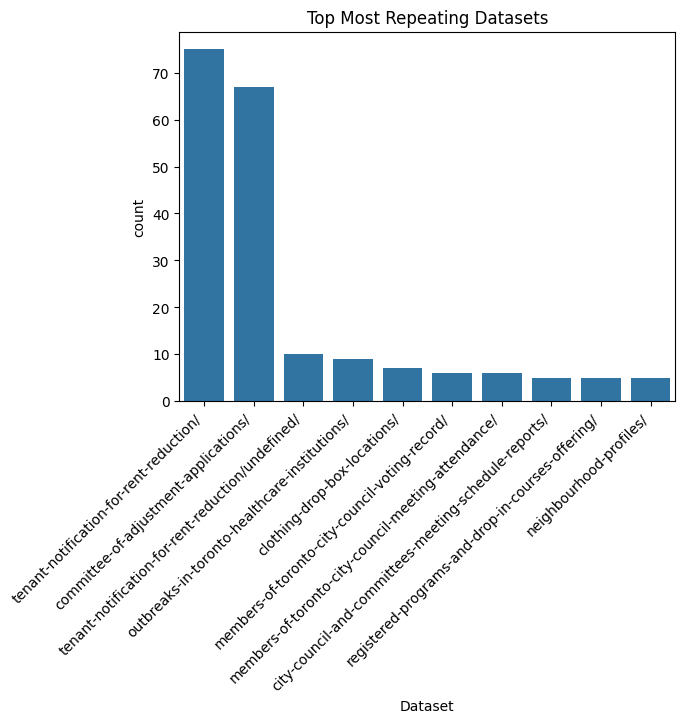

In [74]:
# Count Plot of category details vs count & color = category

top_10_categories = user_ship_df['cleaned-usership']['Link Source - Category Details 1'].value_counts().nlargest(10).index
sns.countplot(data=user_ship_df['cleaned-usership'][user_ship_df['cleaned-usership']['Link Source - Category Details 1'].isin(top_10_categories)], 
              x='Link Source - Category Details 1',
              order=top_10_categories
            #   hue='Link Source - URL Category'
              )

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align them to the right
plt.title("Top Most Repeating Datasets")
plt.xlabel("Dataset")

# sns.countplot(user_ship_df['cleaned-usership'], x='Link Source - URL Category')

In [75]:
# group by name of each dataset and sum of sessions, users and views.

# I DON'T NEED TO DO GROUP BY - TRY WITHOUT & COMPARE RESULTS

# Group by 'Link Source - Category Details 1' and sum the views
views_by_category = user_ship_df['cleaned-usership'][user_ship_df['cleaned-usership']['Link Source - URL Category'] == 'dataset'].groupby('Link Source - Category Details 1')['Views'].sum().reset_index()

# Sort the results in descending order of views
views_by_category = views_by_category.sort_values(by='Views', ascending=False)

# Display the result
print(views_by_category.head(10))

                      Link Source - Category Details 1  Views
184                  dogs-issued-dangerous-dog-orders/  23628
468                   short-term-rentals-registration/  22298
337                            neighbourhood-profiles/  21445
24                                         3d-massing/  17759
356      outbreaks-in-toronto-healthcare-institutions/  12231
564    traffic-volumes-at-intersections-for-all-modes/   8916
174  daily-shelter-overnight-service-occupancy-capa...   8434
340                                    neighbourhoods/   8157
321  municipal-licensing-and-standards-toronto-anim...   7710
420                               property-boundaries/   6735


Text(0, 0.5, 'Dataset Details')

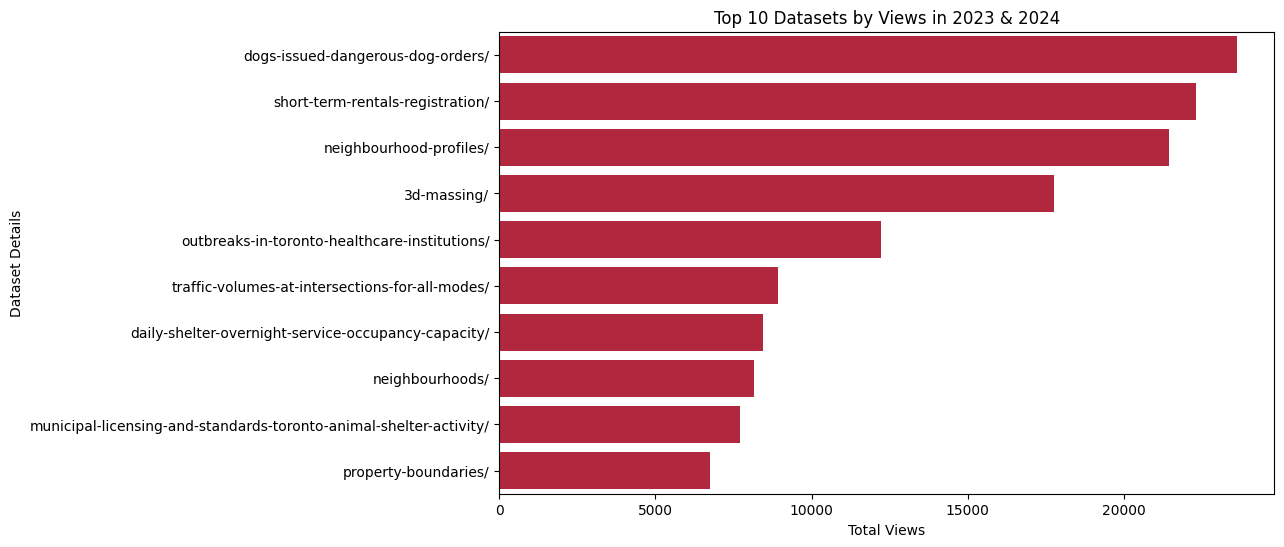

In [77]:
# Plotting the top 10 dataset by views

top_10_views = views_by_category.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_views, x='Views', y='Link Source - Category Details 1', color='#C8102E')
plt.title('Top 10 Datasets by Views in 2023 & 2024')
plt.xlabel('Total Views')
plt.ylabel('Dataset Details')

# need to add labels and remove the xticks

In [78]:
# Group by 'Link Source - Category Details 1' and sum the sessions
sum_of_sessions_by_dataset = user_ship_df['cleaned-usership'][user_ship_df['cleaned-usership']['Link Source - URL Category'] == 'dataset'].groupby('Link Source - Category Details 1')['Sessions'].sum().reset_index()

# Sort the results in descending order of views
sum_of_sessions_by_dataset = sum_of_sessions_by_dataset.sort_values(by='Sessions', ascending=False)

# Display the result
print(sum_of_sessions_by_dataset.head(10))

                      Link Source - Category Details 1  Sessions
184                  dogs-issued-dangerous-dog-orders/     18300
468                   short-term-rentals-registration/     18163
337                            neighbourhood-profiles/     15852
24                                         3d-massing/     14922
356      outbreaks-in-toronto-healthcare-institutions/     10085
564    traffic-volumes-at-intersections-for-all-modes/      7505
321  municipal-licensing-and-standards-toronto-anim...      7356
174  daily-shelter-overnight-service-occupancy-capa...      7085
340                                    neighbourhoods/      7048
420                               property-boundaries/      5831


/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_19607/844377331.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_sessions, x='Sessions', y='Link Source - Category Details 1', palette='viridis')


Text(0, 0.5, 'Dataset Details')

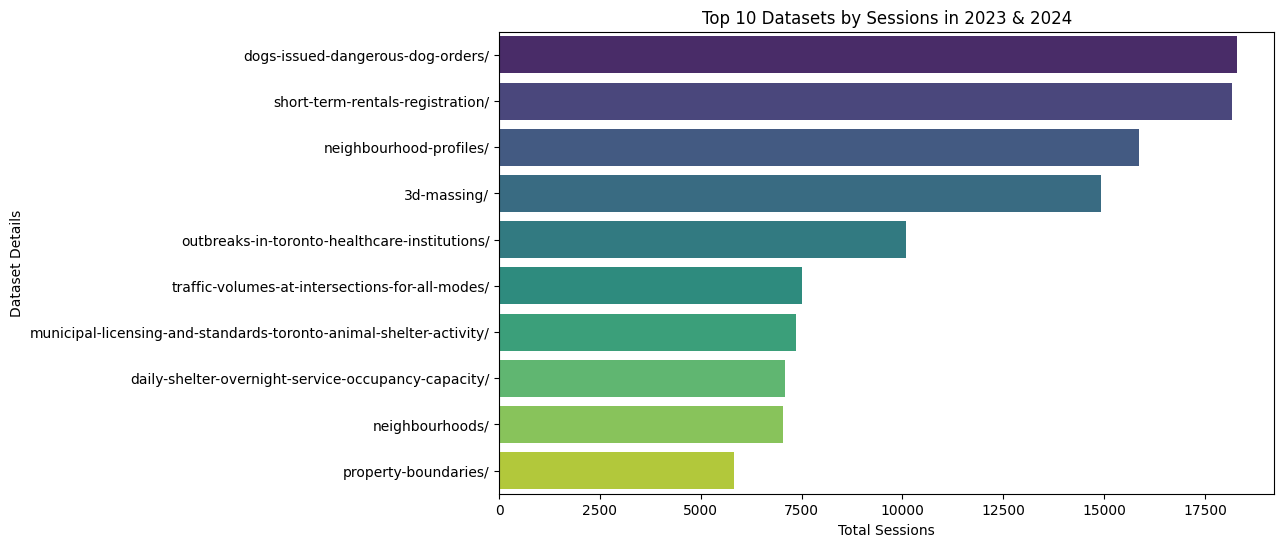

In [118]:
# Plotting the top 10 dataset by sessions

top_10_sessions = sum_of_sessions_by_dataset.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_sessions, x='Sessions', y='Link Source - Category Details 1', palette='viridis')
plt.title('Top 10 Datasets by Sessions in 2023 & 2024')
plt.xlabel('Total Sessions')
plt.ylabel('Dataset Details')

# need to add x labels and remove xticks

In [80]:
# Group by 'Link Source - Category Details 1' and sum the users
sum_of_users_by_dataset = user_ship_df['cleaned-usership'][user_ship_df['cleaned-usership']['Link Source - URL Category'] == 'dataset'].groupby('Link Source - Category Details 1')['Users'].sum().reset_index()

# Sort the results in descending order of views
sum_of_users_by_dataset = sum_of_users_by_dataset.sort_values(by='Users', ascending=False)

# Display the result
print(sum_of_users_by_dataset.head(10))

                      Link Source - Category Details 1  Users
184                  dogs-issued-dangerous-dog-orders/  16188
468                   short-term-rentals-registration/  11735
337                            neighbourhood-profiles/  11100
24                                         3d-massing/   8292
321  municipal-licensing-and-standards-toronto-anim...   6954
356      outbreaks-in-toronto-healthcare-institutions/   6051
212            elections-official-by-election-results/   4751
340                                    neighbourhoods/   4710
564    traffic-volumes-at-intersections-for-all-modes/   4657
174  daily-shelter-overnight-service-occupancy-capa...   4544


/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_19607/648618142.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_users, x='Users', y='Link Source - Category Details 1', palette='viridis')


(0.0, 17806.800000000003)

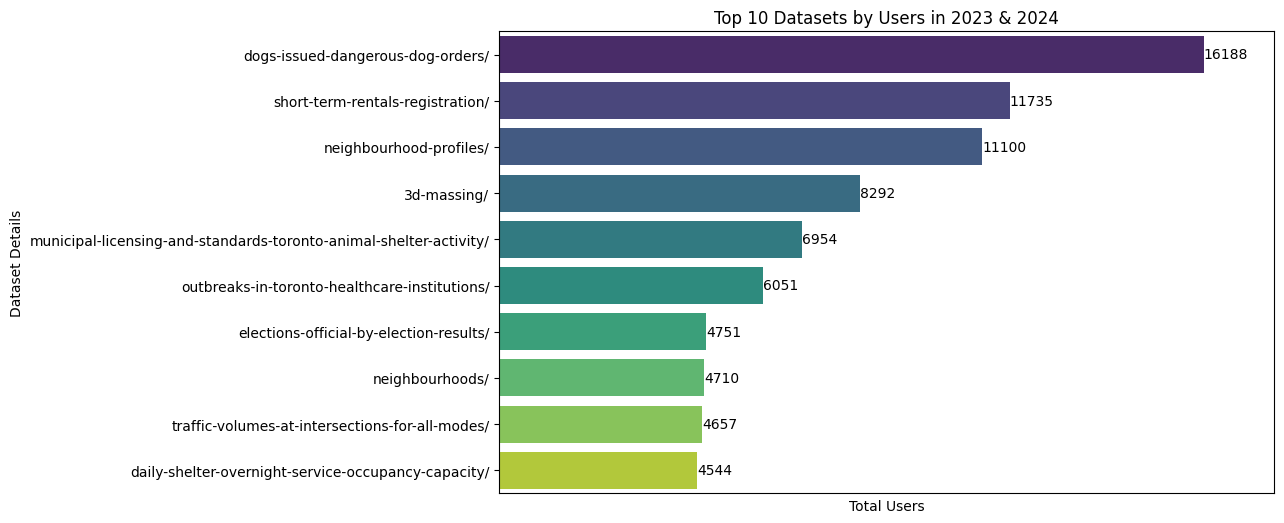

In [116]:
# Plotting the top 10 dataset by users

top_10_users = sum_of_users_by_dataset.head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_10_users, x='Users', y='Link Source - Category Details 1', palette='viridis')
plt.title('Top 10 Datasets by Users in 2023 & 2024')
plt.xlabel('Total Users')
plt.ylabel('Dataset Details')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center')

# Remove x-axis interval values
plt.xticks([])

# Decrease the scale of the x-axis
plt.xlim(0, top_10_users['Users'].max() * 1.1)  # Adjust the multiplier as needed

## Donut Chart on Sessions based on URL Category

In [93]:
# grouping by the category & finding the sum of the 
sum_sessions_url_category = user_ship_df['cleaned-usership'].groupby('Link Source - URL Category')['Sessions'].sum().reset_index()

sum_sessions_url_category = sum_sessions_url_category.sort_values(by='Sessions', ascending=False)
print(sum_sessions_url_category.head(4))

  Link Source - URL Category  Sessions
7                    dataset    430932
4                  catalogue    140302
0                      about     12123
3                  blog-post      6521


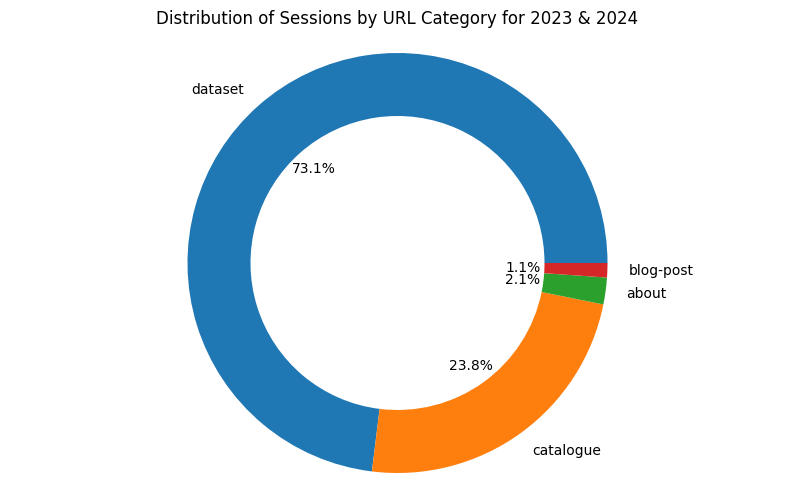

In [117]:
# Create a pie chart for the Top 4 sessions by URL category
top_4_sessions_URL_category = sum_sessions_url_category.head(4)

plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(top_4_sessions_URL_category['Sessions'], 
        labels=top_4_sessions_URL_category['Link Source - URL Category'], 
        autopct='%1.1f%%', 
        wedgeprops=dict(width=0.3))   # Set label font size


plt.title('Distribution of Sessions by URL Category for 2023 & 2024')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Correlation Heatmap of Sessions, Users, and Views 
From Referrer Domains

Text(0.5, 1.0, 'Correlation Heatmap of Sessions, Users and Views')

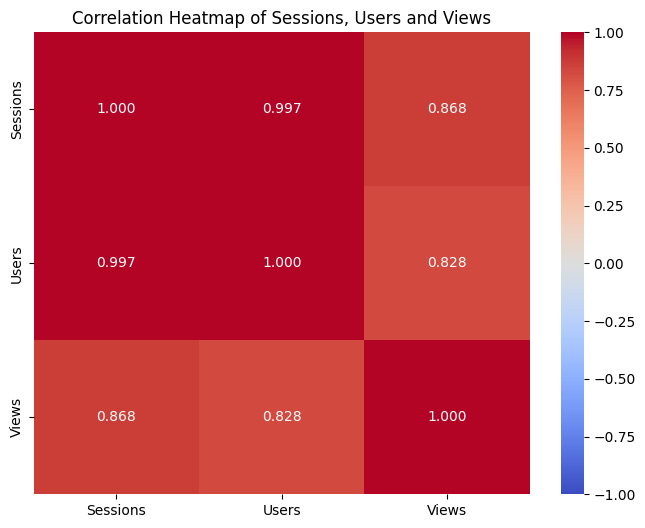

In [38]:
correlation_matrix = referrer_domain_df['data-no-summary'][['Sessions', 'Users', 'Views']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Sessions, Users and Views')


## Top Referring Domains by Sessions in 2023

In [126]:
# group by referring domain, and sessions

sessions_grouped_by_referring_domain = referrer_domain_df['data-no-summary'].groupby('Referring Domain')['Sessions'].sum().reset_index()

sessions_grouped_by_referring_domain = sessions_grouped_by_referring_domain.sort_values(by='Sessions', ascending=False)
sessions_grouped_by_referring_domain.head(5)

,Referring Domain,Sessions
559,open.toronto.ca,244236
956,www.toronto.ca,158084
874,www.google.com,12088
845,www.cp24.com,4156
644,secure.toronto.ca,3290


In [139]:
# checking for these websites over time

top_5_referring_domains = referrer_domain_df['data-no-summary'][referrer_domain_df['data-no-summary']['Referring Domain'].isin(['open.toronto.ca',
                                                                                                                                'www.toronto.ca',
                                                                                                                                'www.google.com',
                                                                                                                                'www.cp24.com',
                                                                                                                                'secure.toronto.ca'])]
top_5_referring_domains_2023 = top_5_referring_domains[top_5_referring_domains['Date (YYYY)'] == 2023]
# print(top_5_referring_domains_2023)
# now grouping this based on date 
top_5_domains_grouped_date_2023 = top_5_referring_domains_2023.groupby(['Referring Domain', 'Date (MM)', 'Date (YYYY)']).sum('Sessions').reset_index()

# Map month numbers to month names
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
top_5_domains_grouped_date_2023['Date (MM)'] = top_5_domains_grouped_date_2023['Date (MM)'].map(month_mapping)

top_5_domains_grouped_date_2023

,Referring Domain,Date (MM),Date (YYYY),Date (DD),Date (Numeric),Sessions,Users,Views
0,open.toronto.ca,Jan,2023,496,1393202,8985,7489,21475
1,open.toronto.ca,Feb,2023,406,1259202,9495,7994,20907
2,open.toronto.ca,Mar,2023,496,1395031,11741,9541,31377
3,open.toronto.ca,Apr,2023,465,1350945,8534,6903,20680
4,open.toronto.ca,May,2023,496,1396922,7561,6518,16822
5,open.toronto.ca,Jun,2023,465,1352775,9723,8473,18015
6,open.toronto.ca,Jul,2023,496,1398813,8298,7176,15316
7,open.toronto.ca,Aug,2023,496,1399774,7259,6109,16323
8,open.toronto.ca,Sep,2023,465,1355535,9674,8122,23571
9,open.toronto.ca,Oct,2023,496,1401665,11035,9268,25311


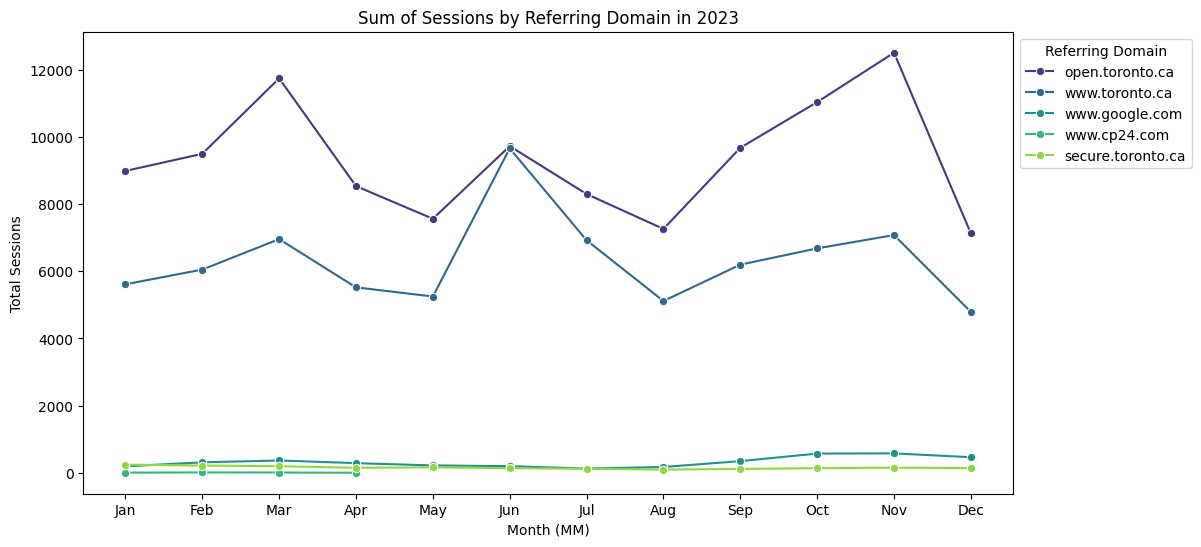

In [150]:
legend_hue_order = ['open.toronto.ca', 'www.toronto.ca', 'www.google.com', 'www.cp24.com', 'secure.toronto.ca']

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_5_domains_grouped_date_2023, x='Date (MM)', y='Sessions', hue='Referring Domain', marker='o', palette='viridis', hue_order=legend_hue_order)
plt.title('Sum of Sessions by Referring Domain in 2023')
plt.xlabel('Month (MM)')
plt.ylabel('Total Sessions')
plt.legend(title='Referring Domain', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Top Referring Domain By Sessions (2024)

In [153]:
top_5_referring_domains_2024 = top_5_referring_domains[top_5_referring_domains['Date (YYYY)'] == 2024]
# print(top_5_referring_domains_2024)
# now grouping this based on date 
top_5_domains_grouped_date_2024 = top_5_referring_domains_2024.groupby(['Referring Domain', 'Date (MM)', 'Date (YYYY)']).sum('Sessions').reset_index()

# Map month numbers to month names
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
top_5_domains_grouped_date_2024['Date (MM)'] = top_5_domains_grouped_date_2024['Date (MM)'].map(month_mapping)

top_5_domains_grouped_date_2024.head()

,Referring Domain,Date (MM),Date (YYYY),Date (DD),Date (Numeric),Sessions,Users,Views
0,open.toronto.ca,Jan,2024,496,1404517,12437,10150,30441
1,open.toronto.ca,Feb,2024,435,1314773,10958,9255,23918
2,open.toronto.ca,Mar,2024,496,1406377,12717,10486,32347
3,open.toronto.ca,Apr,2024,465,1361925,20663,19003,23499
4,open.toronto.ca,May,2024,496,1408268,9764,8538,18857


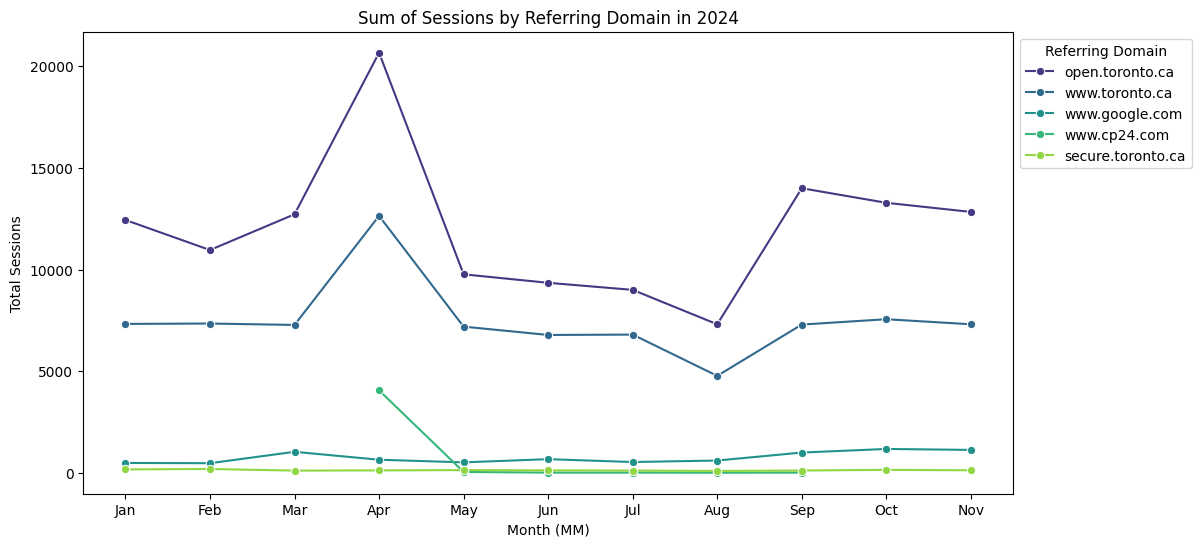

In [154]:
legend_hue_order = ['open.toronto.ca', 'www.toronto.ca', 'www.google.com', 'www.cp24.com', 'secure.toronto.ca']

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_5_domains_grouped_date_2024, x='Date (MM)', y='Sessions', hue='Referring Domain', marker='o', palette='viridis', hue_order=legend_hue_order)
plt.title('Sum of Sessions by Referring Domain in 2024')
plt.xlabel('Month (MM)')
plt.ylabel('Total Sessions')
plt.legend(title='Referring Domain', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Word Cloud on Search Terms (2023 & 2024)

In [155]:
from wordcloud import WordCloud

In [166]:
top_searched_terms = search_terms_df['data-summary'].sort_values(by="Views", ascending=False)

top_searched_terms.head()

,Search Term -Generic (search=),Views
0,elections,5018
1,ttc,2666
2,housing,2095
3,3d massing,2043
4,neighbourhood,1730


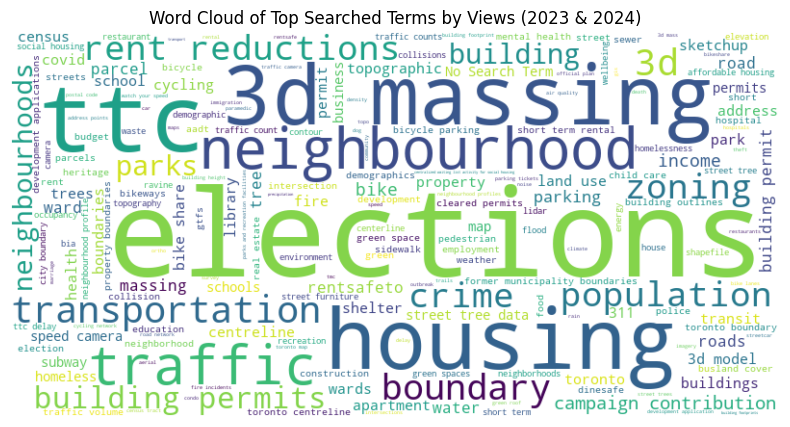

In [176]:
# Replace NaN values in the 'Search Term -Generic (search=)' column with "No String"
top_searched_terms['Search Term -Generic (search=)'] = top_searched_terms['Search Term -Generic (search=)'].fillna("No Search Term")

# Create a dictionary of search terms and their corresponding views
word_freq = dict(zip(top_searched_terms['Search Term -Generic (search=)'], top_searched_terms['Views']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Top Searched Terms by Views (2023 & 2024)')
plt.show()

## Word Cloud on Search Terms in 2023

## Word Cloud on Search Terms in 2024

## Search Terms Frequency over Time